In [43]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [126]:
# fetching data from computer 
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\IBM_HR_Attrition_Rate_Analytics-master\IBM_HR_Attrition_Rate_Analytics-master\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [45]:
# To fetch the details of rows
pd.set_option('display.max_rows',None)

In [46]:
# To fetch the detail of rows and coloumns
data.shape

(1470, 35)

In [47]:
# To fetch the details of columns 
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [48]:
# To fetching the datatypes of the columns
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [49]:
# Here we are getting details of the data like null values mean,standard deviation and to identify outlier
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [50]:
# To see the data 
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [51]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Male','Female']])
df1 = ord_encoder.fit_transform(data[['Gender']])
df1

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [52]:
# changing data values in main data
data['Gender']=df1

In [53]:
#droping column because all are above 18
data.drop(['Over18'],axis=1,inplace=True)


In [54]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df2 = ord_encoder.fit_transform(data[['Attrition']])
df2

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [55]:
# changing data values in main data
data['Attrition']=df2

In [56]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Travel_Rarely','Travel_Frequently','Non-Travel']])
df3 = ord_encoder.fit_transform(data[['BusinessTravel']])
df3

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [57]:
# changing data values in main data
data['BusinessTravel']=df3

In [58]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Sales','Research & Developmen','Human Resources', 'Research & Development']])
df4= ord_encoder.fit_transform(data[['Department']])
df4

array([[0.],
       [3.],
       [3.],
       ...,
       [3.],
       [0.],
       [3.]])

In [59]:
# changing data values in main data
data['Department']=df4

In [74]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Married','Single','Divorced']])
df5= ord_encoder.fit_transform(data[['MaritalStatus']])
df5

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [75]:
# changing data values in main data
data['Department']=df5

In [62]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df6= ord_encoder.fit_transform(data[['OverTime']])
df6

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [63]:
# changing data values in main data
data['OverTime']=df6

In [64]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Life Sciences','Other','Medical','Marketing', 'Human Resources', 'Technical Degree']])
df7= ord_encoder.fit_transform(data[['EducationField']])
df7

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [2.],
       [2.]])

In [65]:
# changing data values in main data
data['EducationField']=df7

In [66]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Manufacturing Director','Sales Executive','Research Scientist','Healthcare Representative','Sales Representative','Research Director','Laboratory Technician', 'Manager','Human Resources']])
df8= ord_encoder.fit_transform(data[['JobRole']])
df8

array([[1.],
       [2.],
       [6.],
       ...,
       [0.],
       [1.],
       [6.]])

In [67]:
# changing data values in main data
data['JobRole']=df8

In [68]:
# To see the detail of data
data

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        0.0             0.0       1102         1.0                 1   
1      49        1.0             1.0        279         0.0                 8   
2      37        0.0             0.0       1373         1.0                 2   
3      33        1.0             1.0       1392         0.0                 3   
4      27        1.0             0.0        591         0.0                 2   
5      32        1.0             1.0       1005         1.0                 2   
6      59        1.0             0.0       1324         0.0                 3   
7      30        1.0             0.0       1358         2.0                24   
8      38        1.0             1.0        216         1.0                23   
9      36        1.0             0.0       1299         0.0                27   
10     35        1.0             0.0        809         0.0                16   
11     29        1.0             0.0        153         1.0                15   
12     31        1.0             0.0        670         2.0                26   
13     34        1.0             0.0       1346         2.0                19   
14     28        0.0             0.0        103         1.0                24   
15     29        1.0             0.0       1389         2.0                21   
16     32        1.0             0.0        334         2.0                 5   
17     22        1.0             2.0       1123         2.0                16   
18     53        1.0             0.0       1219         0.0                 2   
19     38        1.0             0.0        371         1.0                 2   
20     24        1.0             2.0        673         2.0                11   
21     36        0.0             0.0       1218         1.0                 9   
22     34        1.0             0.0        419         1.0                 7   
23     21        1.0             0.0        391         1.0                15   
24     34        0.0             0.0        699         1.0                 6   
25     53        1.0             0.0       1282         2.0                 5   
26     32        0.0             1.0       1125         1.0                16   
27     42        1.0             0.0        691         0.0                 8   
28     44        1.0             0.0        477         0.0                 7   
29     46        1.0             0.0        705         1.0                 2   
30     33        1.0             0.0        924         1.0                 2   
31     44        1.0             0.0       1459         0.0                10   
32     30        1.0             0.0        125         1.0                 9   
33     39        0.0             0.0        895         0.0                 5   
34     24        0.0             0.0        813         0.0                 1   
35     43        1.0             0.0       1273         2.0                 2   
36     50        0.0             0.0        869         0.0                 3   
37     35        1.0             0.0        890         0.0                 2   
38     36        1.0             0.0        852         0.0                 5   
39     33        1.0             1.0       1141         0.0                 1   
40     35        1.0             0.0        464         2.0                 4   
41     27        1.0             0.0       1240         2.0                 2   
42     26        0.0             0.0       1357         1.0                25   
43     27        1.0             1.0        994         1.0                 8   
44     30        1.0             1.0        721         1.0                 1   
45     41        0.0             0.0       1360         0.0                12   
46     34        1.0             2.0       1065         1.0                23   
47     37        1.0             0.0        408         0.0                19   
48     46        1.0             1.0 

In [76]:
# now checking the data if there some other data type 
data.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears           

In [77]:
# droping data 
data.drop(['MaritalStatus'],axis=1,inplace=True)

In [78]:
data.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

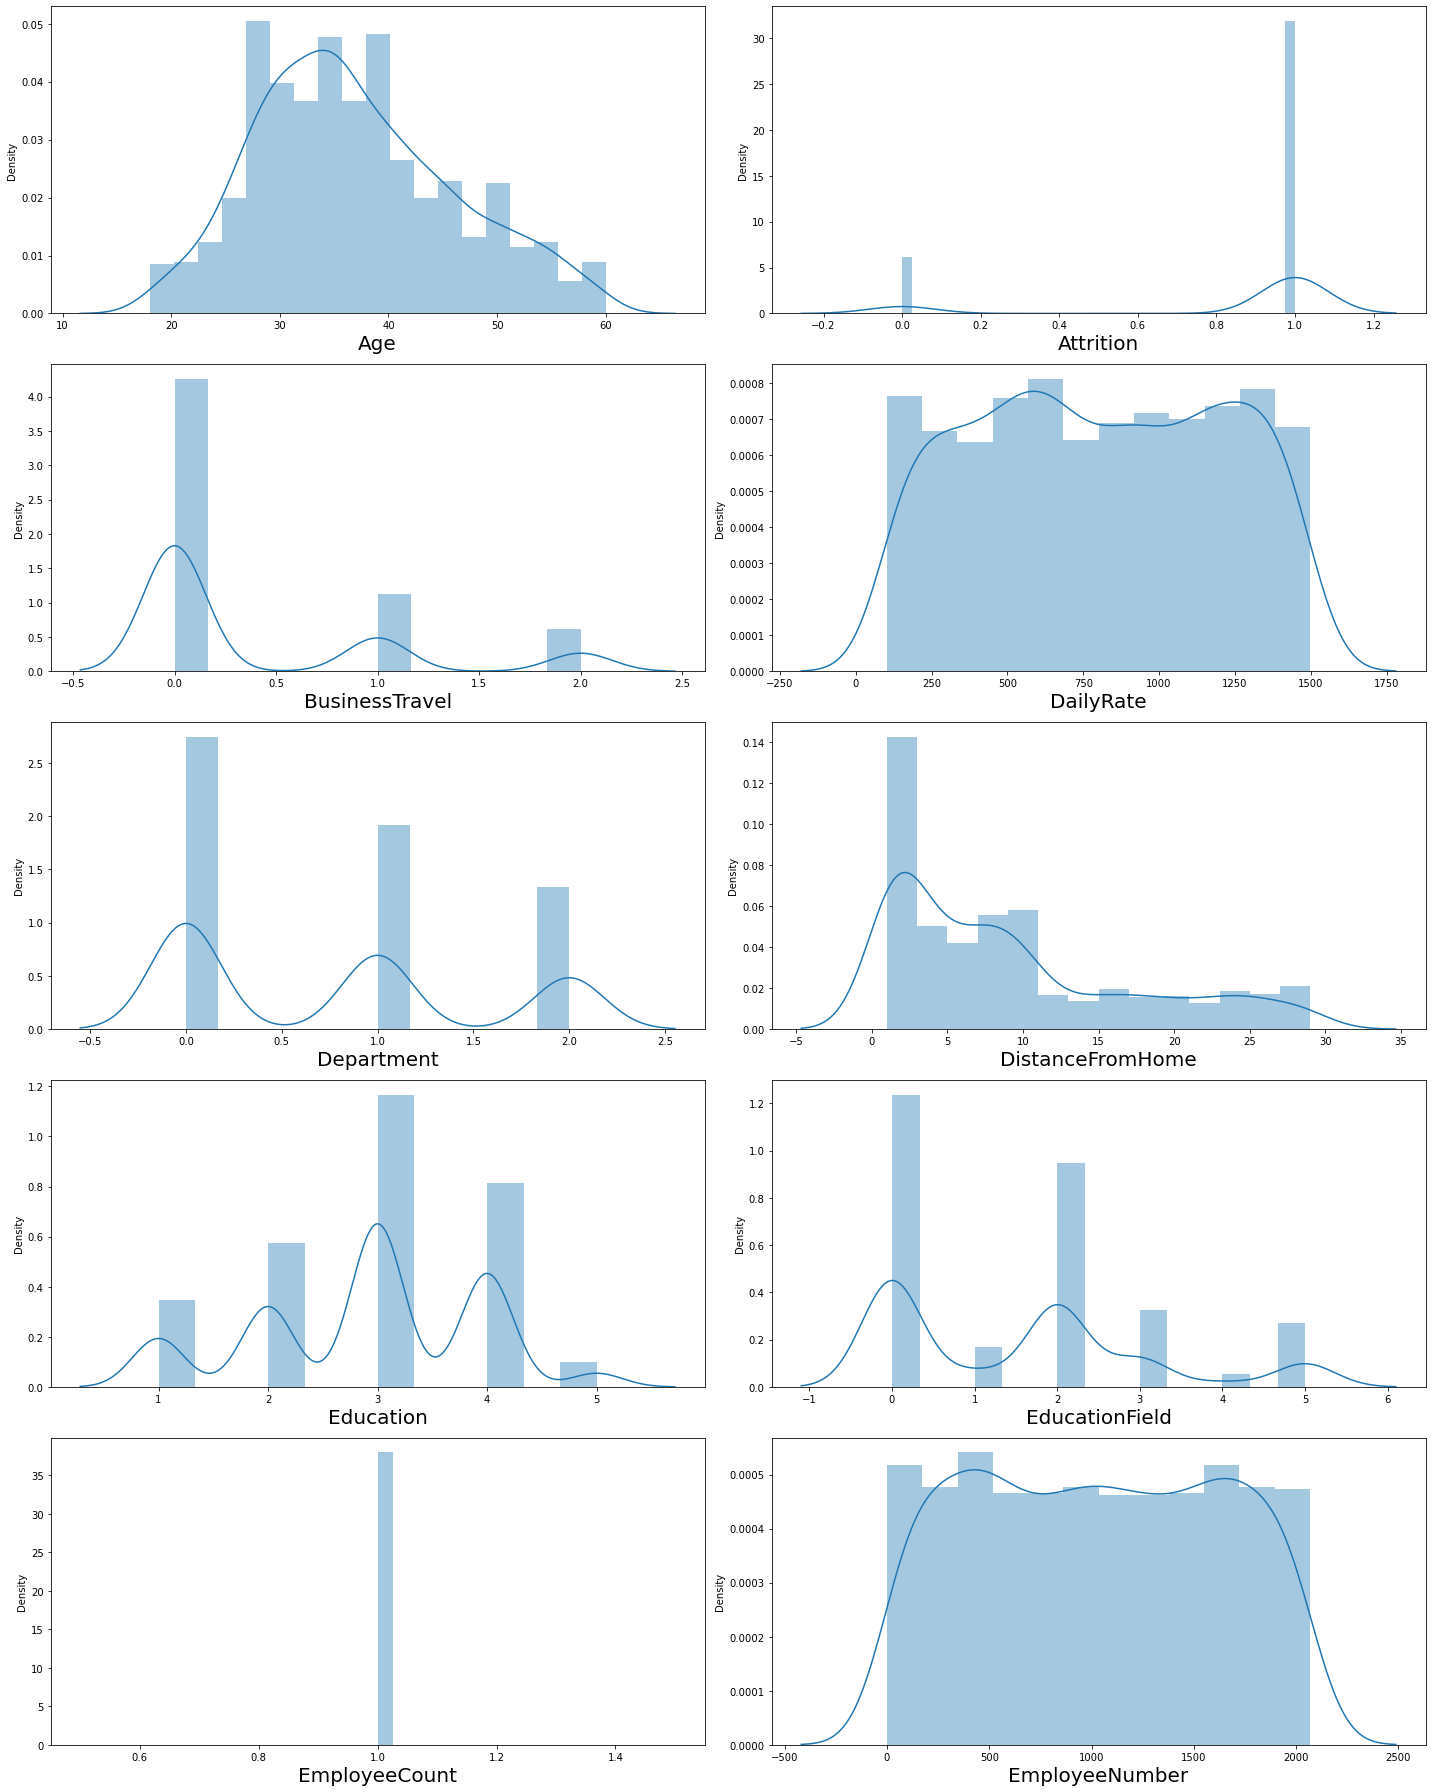

In [79]:
# plotting distribution plot to chek the skewness of data 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax =plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [80]:
# checking for skewed data 
data.skew()

Age                         0.413286
Attrition                  -1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                  0.443615
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.741989
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                      0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.418773
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                   -0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [81]:
# performing operation to remove skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [82]:
# now checking if the skewness is removed or not
df_new.skew()

Age                        -0.007603
Attrition                  -1.844366
BusinessTravel              0.930828
DailyRate                  -0.196160
Department                  0.078558
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField              0.017101
EmployeeCount               0.000000
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                      0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.069560
JobSatisfaction            -0.212815
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                   -0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
T

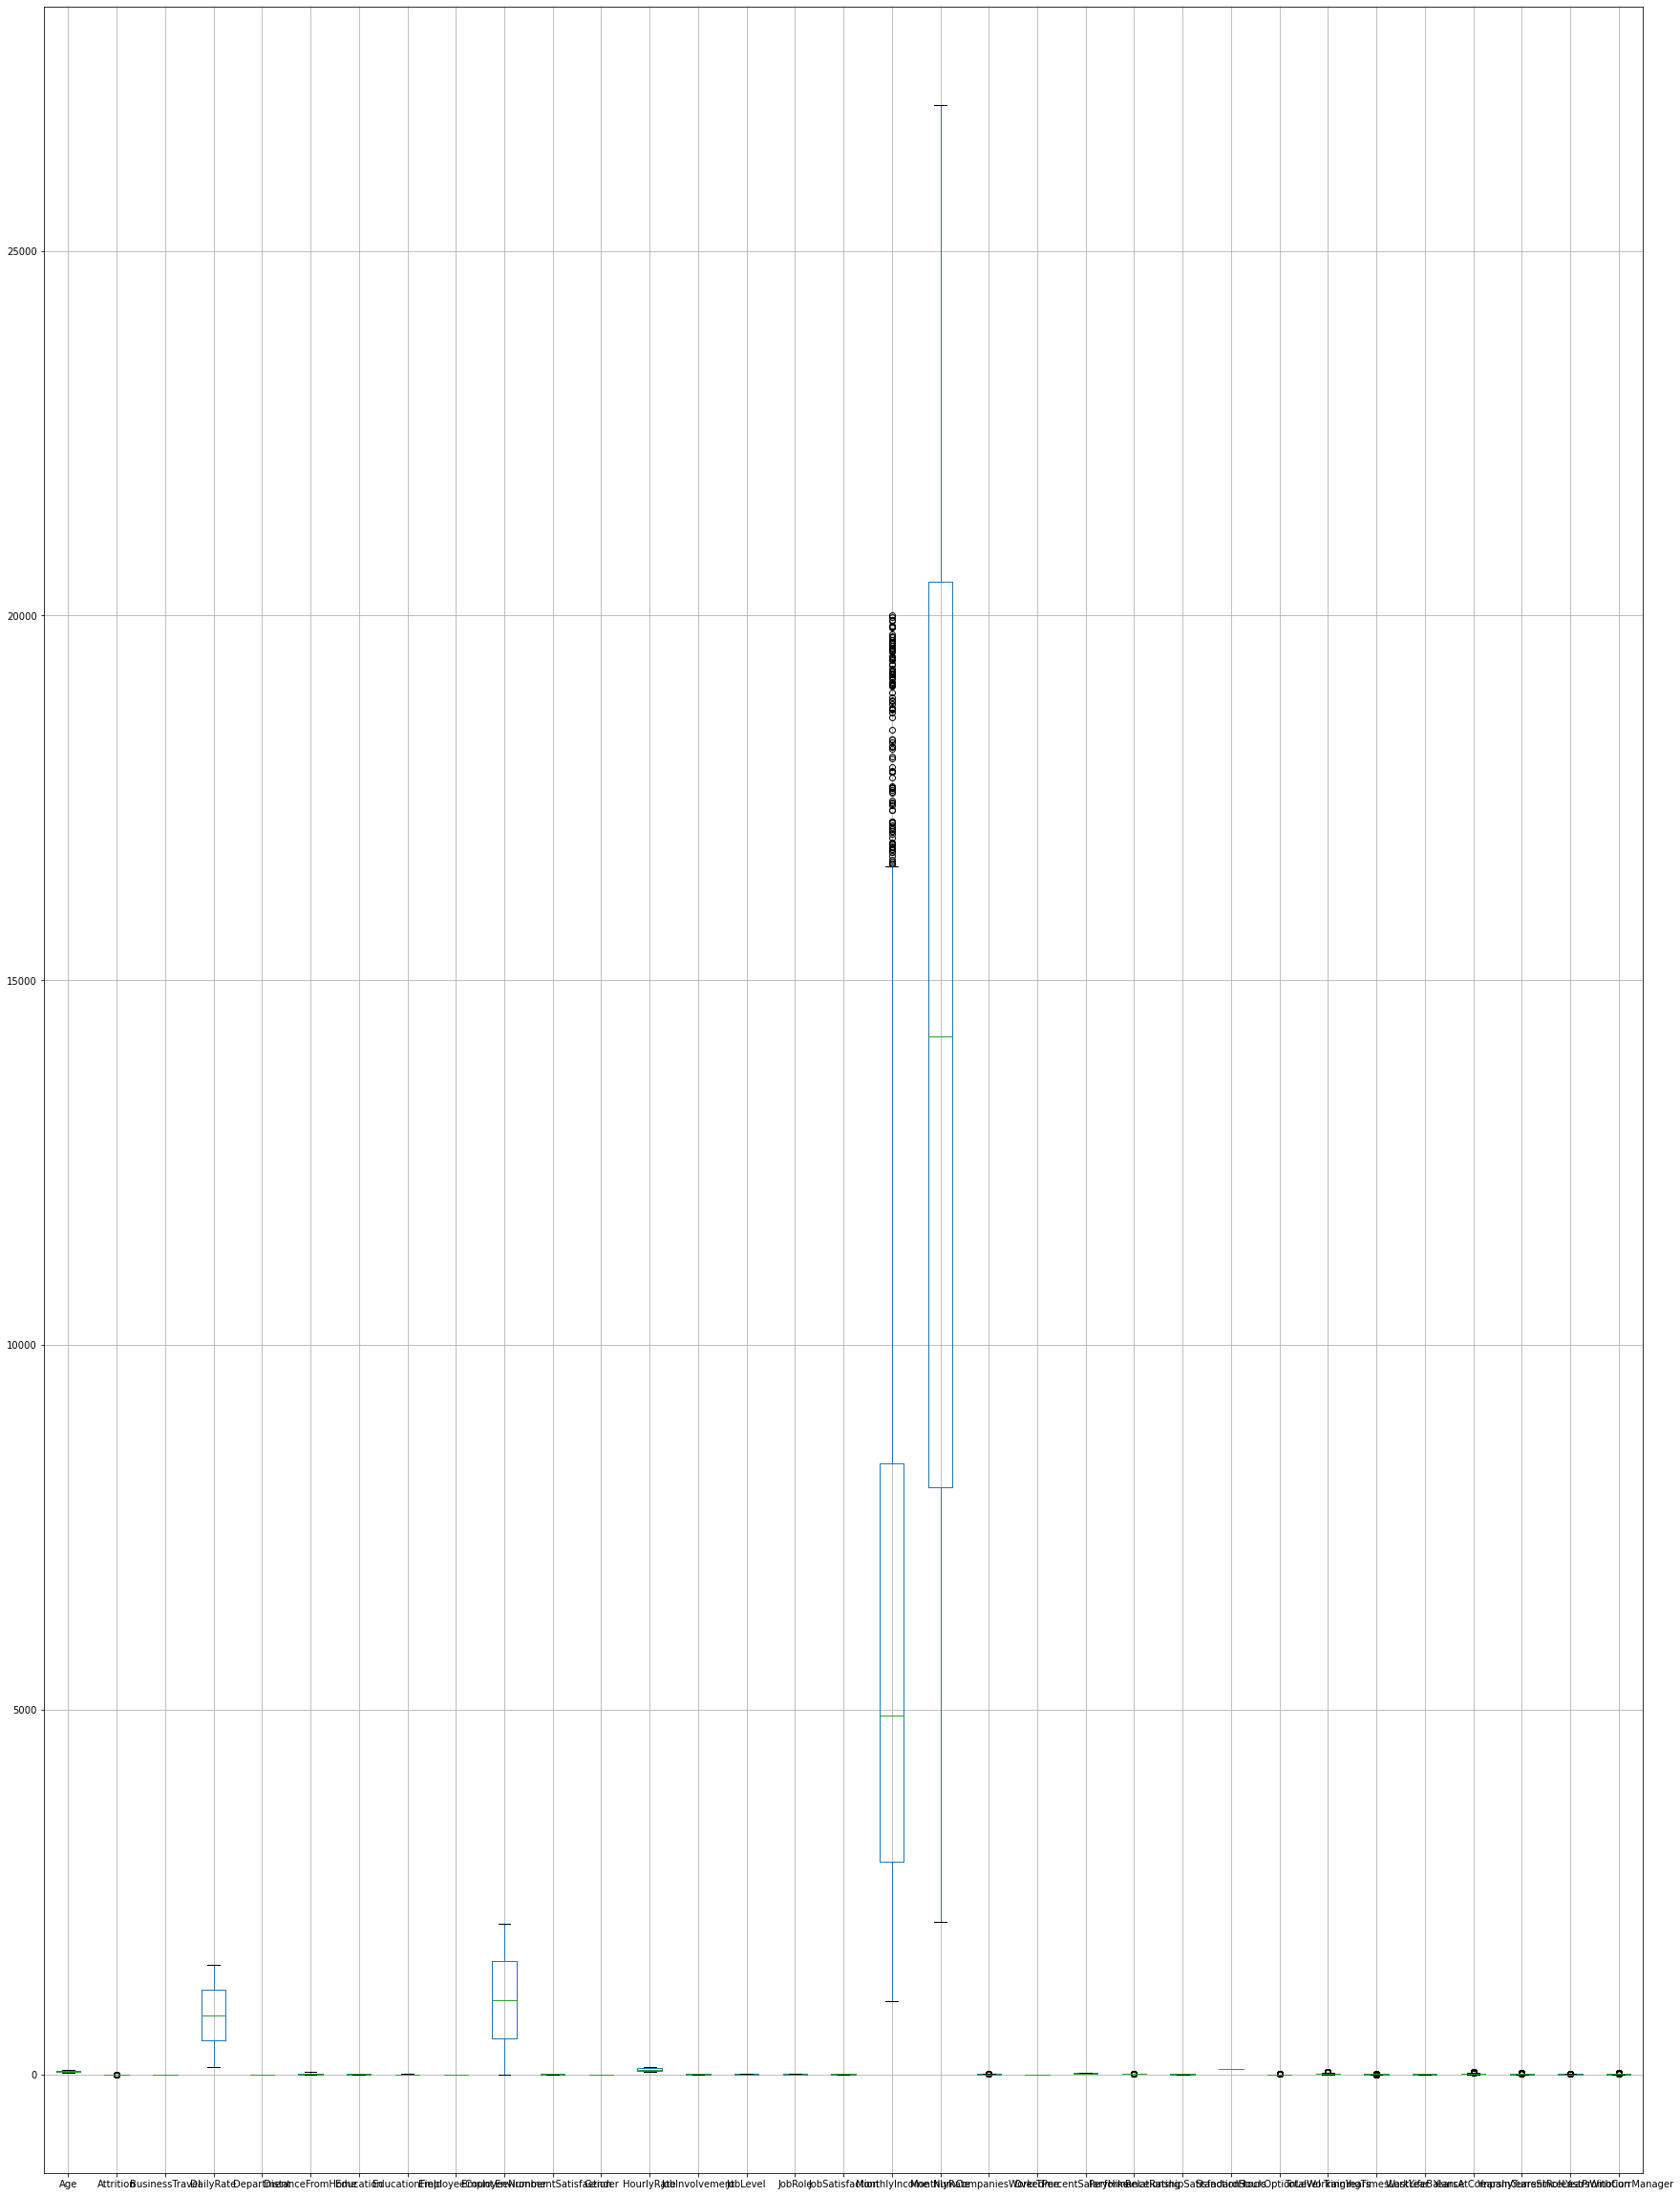

In [83]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [84]:
# implementing standard scalar
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[ 0.4463504 , -2.28090588, -0.59004834, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521,  0.4384223 ,  0.91319439, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  , -2.28090588, -0.59004834, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.4384223 , -0.59004834, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.4384223 ,  0.91319439, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.4384223 , -0.59004834, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [86]:
# it minimizes the number of variables used to explain the maximum amount of variance for a given data set.
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

In [87]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x)

In [88]:
x_new 

array([[-0.60464873, -1.62731645,  0.12674487, ..., -1.48846781,
        -1.96322083, -1.7765104 ],
       [ 0.64294998,  2.60393026,  2.14848526, ...,  0.33174589,
         0.52186793,  1.09454851],
       [-2.62732239, -1.4458578 ,  0.54904913, ..., -1.62786174,
        -0.66962982,  0.54896163],
       ...,
       [-1.27277071,  1.69566773,  1.8548604 , ..., -0.81165783,
        -0.88322602, -0.80748964],
       [ 0.97469917, -0.1879428 , -0.61828677, ...,  0.34306298,
         0.0525005 ,  0.02475057],
       [-1.09143827, -0.58269355, -0.80307272, ..., -0.24518534,
        -0.14922859, -1.14999618]])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

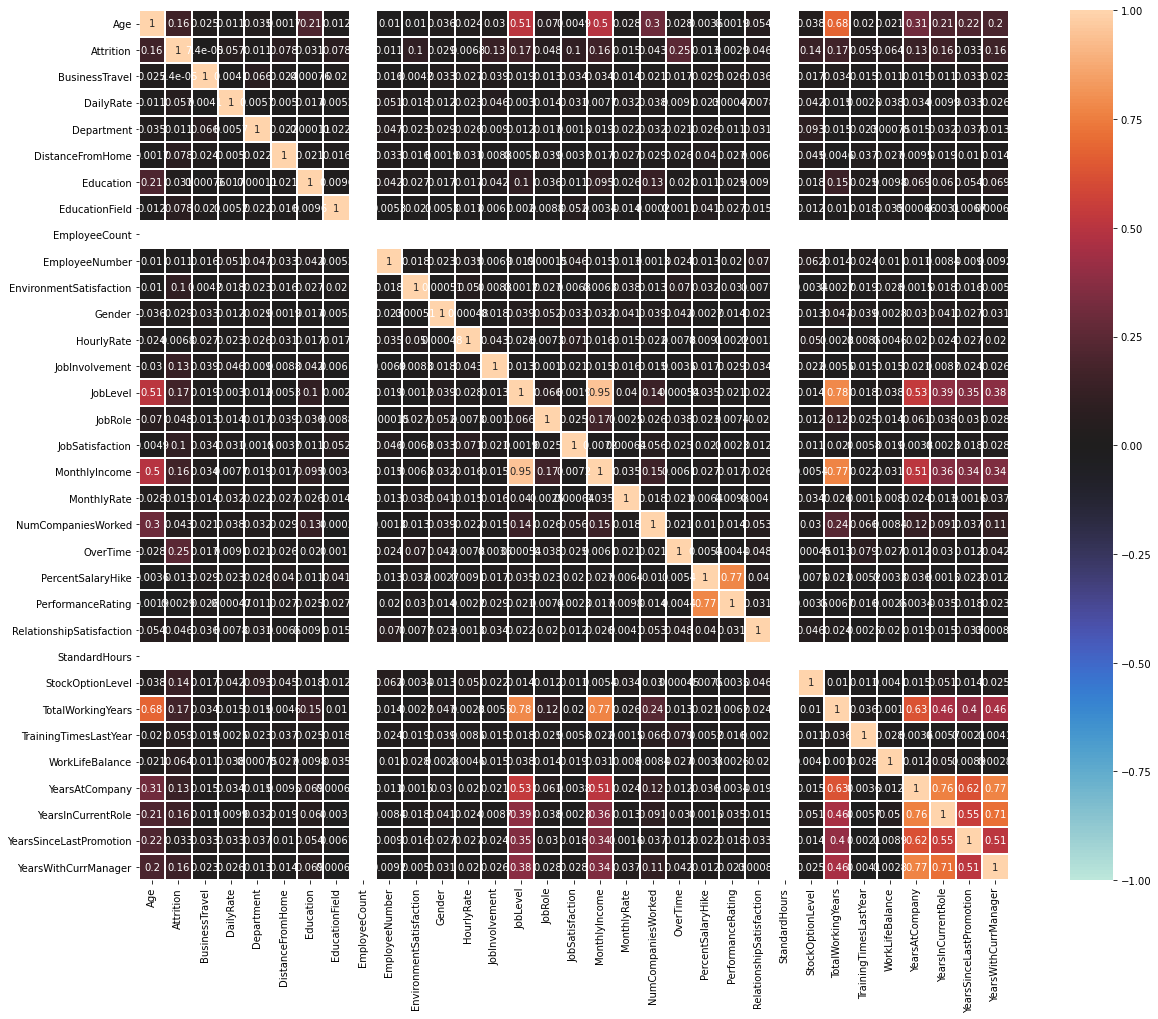

In [90]:
# checking of corelation using heat map
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [93]:
# splitting the data in x and y form for test and train
y=data['Attrition']

x=data.drop(columns=['Attrition'])

In [94]:
y

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      0.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      0.0
22      1.0
23      1.0
24      0.0
25      1.0
26      0.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
32      1.0
33      0.0
34      0.0
35      1.0
36      0.0
37      1.0
38      1.0
39      1.0
40      1.0
41      1.0
42      0.0
43      1.0
44      1.0
45      0.0
46      1.0
47      1.0
48      1.0
49      1.0
50      0.0
51      0.0
52      1.0
53      1.0
54      1.0
55      1.0
56      1.0
57      1.0
58      1.0
59      1.0
60      1.0
61      1.0
62      1.0
63      1.0
64      1.0
65      1.0
66      1.0
67      1.0
68      1.0
69      0.0
70      1.0
71      1.0
72      1.0
73      1.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      1.0
82      1.0
83  

In [95]:
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41             0.0       1102         1.0                 1          2   
1      49             1.0        279         0.0                 8          1   
2      37             0.0       1373         1.0                 2          2   
3      33             1.0       1392         0.0                 3          4   
4      27             0.0        591         0.0                 2          1   
5      32             1.0       1005         1.0                 2          2   
6      59             0.0       1324         0.0                 3          3   
7      30             0.0       1358         2.0                24          1   
8      38             1.0        216         1.0                23          3   
9      36             0.0       1299         0.0                27          3   
10     35             0.0        809         0.0                16          3   
11     29             0.0        153         1.0                15          2   
12     31             0.0        670         2.0                26          1   
13     34             0.0       1346         2.0                19          2   
14     28             0.0        103         1.0                24          3   
15     29             0.0       1389         2.0                21          4   
16     32             0.0        334         2.0                 5          2   
17     22             2.0       1123         2.0                16          2   
18     53             0.0       1219         0.0                 2          4   
19     38             0.0        371         1.0                 2          3   
20     24             2.0        673         2.0                11          2   
21     36             0.0       1218         1.0                 9          4   
22     34             0.0        419         1.0                 7          4   
23     21             0.0        391         1.0                15          2   
24     34             0.0        699         1.0                 6          1   
25     53             0.0       1282         2.0                 5          3   
26     32             1.0       1125         1.0                16          1   
27     42             0.0        691         0.0                 8          4   
28     44             0.0        477         0.0                 7          4   
29     46             0.0        705         1.0                 2          4   
30     33             0.0        924         1.0                 2          3   
31     44             0.0       1459         0.0                10          4   
32     30             0.0        125         1.0                 9          2   
33     39             0.0        895         0.0                 5          3   
34     24             0.0        813         0.0                 1          3   
35     43             0.0       1273         2.0                 2          2   
36     50             0.0        869         0.0                 3          2   
37     35             0.0        890         0.0                 2          3   
38     36             0.0        852         0.0                 5          4   
39     33             1.0       1141         0.0                 1          3   
40     35             0.0        464         2.0                 4          2   
41     27             0.0       1240         2.0                 2          4   
42     26             0.0       1357         1.0                25          3   
43     27             1.0        994         1.0                 8          3   
44     30             1.0        721         1.0                 1          2   
45     41             0.0       1360         0.0                12          3   
46     34             2.0       1065         1.0                23          4   
47     37             0.0        408         0.0                19          2   
48     46             1.0       1211 

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [97]:
#using dtc algoritm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
clf.score(x_train,y_train)

1.0

In [99]:
y_pred=clf.predict(x_test)

In [100]:
clf.score(x_test,y_test)

0.8016304347826086

In [101]:
#using logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred=log_reg.predict(x_test)

In [103]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8342391304347826

In [104]:
# cross validation score for the algorithm log_reg
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.8401360544217689


In [105]:
#cross validation score for the algorithm clf
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.7795918367346939


In [106]:
#implementing the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [107]:
#accuracy score
print(accuracy_score(y_test,predrf))

0.8369565217391305


In [108]:
#confusion matrix
print(confusion_matrix(y_test,predrf))

[[  8  55]
 [  5 300]]


In [109]:
#classification report
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.62      0.13      0.21        63
         1.0       0.85      0.98      0.91       305

    accuracy                           0.84       368
   macro avg       0.73      0.56      0.56       368
weighted avg       0.81      0.84      0.79       368



In [110]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [111]:
print(accuracy_score(y_test,predrf))

0.8369565217391305


In [112]:
print(confusion_matrix(y_test,predrf))

[[  8  55]
 [  5 300]]


In [113]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.62      0.13      0.21        63
         1.0       0.85      0.98      0.91       305

    accuracy                           0.84       368
   macro avg       0.73      0.56      0.56       368
weighted avg       0.81      0.84      0.79       368



In [115]:
#probability 
probes = rf.predict_proba(x_test)

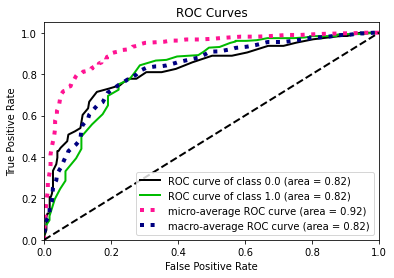

In [116]:
#drawing the roc curve for my model
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [117]:
# implementing the grid search cv
from sklearn.model_selection import GridSearchCV

In [118]:
parameters={'n_estimators':[100,200],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9],
           'criterion':['gini','entropy']}

In [119]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [120]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [121]:
#best parameters
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [123]:
mod = RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100)

In [124]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.8396739130434783


In [125]:
#model saving
import pickle

from sklearn import model_selection
filename = 'HR.sav'
pickle.dump(data, open(filename, 'wb'))